In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Входные данные

In [15]:
data = pd.read_csv("./data/2010_ver1_01001_synth_people.txt", sep=",")

Для агентного моделирования эпидемиологических явлений требуется представление популяции в виде файла, однако сбор реальных даннных о населении невозможен, поэтому используются синтетически генерируемые популяции, приближенные к реальным.  

По стандартам RTIInternational синтетическая популяция состоит из '.txt' файла. Каждая ее строка соответствует индивиду из популяции.

Каждый из них описывается 11 параметрами: sp_id, sp_hh_id, serialno, stcotrbg, age, sex, race, sporder, relate, sp_school_id, sp_work_id

In [16]:
data.head()

,sp_id,sp_hh_id,serialno,stcotrbg,age,sex,race,sporder,relate,sp_school_id,sp_work_id
0,119493314,1575686,2007000006927,10010204001,49,1,1,2,1,NaN,500136309.0
1,119493315,1575686,2007000006927,10010204001,45,2,1,1,0,NaN,500143905.0
2,119493322,1586030,2007000006927,10010208022,6,2,1,3,2,450055504.0,NaN
3,119493323,1586030,2007000006927,10010208022,49,1,1,2,1,NaN,500109885.0
4,119493324,1586030,2007000006927,10010208022,45,2,1,1,0,NaN,500135914.0


sp_id - уникальный идентефикатор человека

sp_hh_id - идентификатор жилища человека (у всех людей, живущих в одной квартире(частном доме, ...), он одинаков)

sp_school_id - идентификатор школы (пустой у не учащихся)

sp_work_id - идентификатор работы (пустой у не работающих)

# Параметры

Для запуска модели нужно выполнить следующую команду:

`./multi_agent_model alpha lmbd InitInfCount duration ./path_to_data.txt ./path_to_result.txt`

alpha - доля людей, не восприимчивых к болезни в популяции

lmbd - степень заразности вируса

InitInfCount - количество первоначально инфицированных

duration - длительность моделирования

# Выходные данные

In [21]:
result = pd.read_csv("result.txt")

Выходные данные пердставляют собой количество больных людей в популяции на i-й день

[]

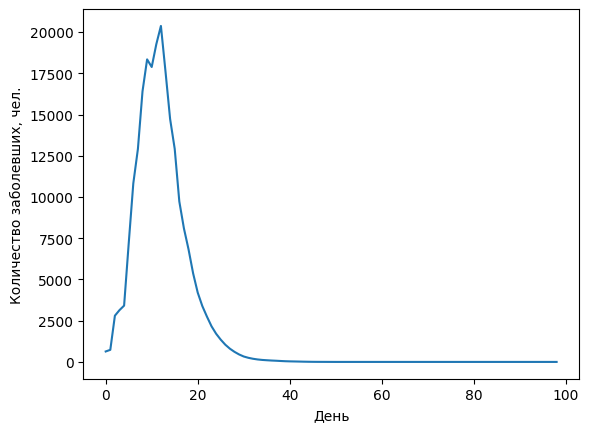

In [22]:
plt.plot(result)

plt.xlabel("День")
plt.ylabel("Количество заболевших, чел.")
plt.plot()

# Зачем это нужно?

Представим начало эпидемии, допустим прошло 14 дней, значит на текущий момент у нас есть данные о заболеваемости за это время

[]

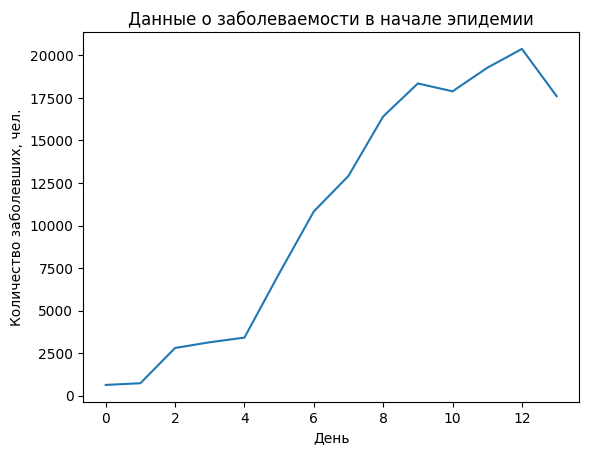

In [25]:
plt.plot(result[:14])

plt.xlabel("День")
plt.ylabel("Количество заболевших, чел.")
plt.title("Данные о заболеваемости в начале эпидемии")
plt.plot()

Тогда калибруя выход мультиагентной модели на эти данные, можно оценить примерные ее масштабы, верхние и нижние границы заболеваемости

Ниже показан пример такой калибровки

![Компьютер](exp.jpg)

# Алгоритм работы

1) проверяется валидность данных в каждой строке
2) создается массив людей (для удобства переопределяются id людей так, что у первого человека он равен 1 и далее по порядку)
3) создается массив связных списков для домовладений, id домовладений изменяются так, чтобы начинаться с 1 для удобства

на i-м месте массива находится связный список, который интерпретируется, как место жительства с id=i, в связном списке находятся все живущие там небольные люди 

4) такие же массивы связных списков создаются для работ и школ
5) случайно выбираются первоначально зараженные и создается связный список больных людей
6) происходит одинь день моделирования
    1. идет проход по связному списку больных, для каждого
        1. в соответствии с днем заболевания по функции Барояна-Рвачева определяется заразность индивида
        2. происходит попытка заражения всех контактирующих с ним людей в доме, школе (если учится), работе (если работает)
        3. если кто-то заражается, он добаляется в список заболевших и удаляется из всех мест заражения
        4. если человек был на 7 дне заболевания, он становится выздоровевшим и невосприимчивым к заболеванию
    2. подсчитывается и сохраняется число заболевших за день
7) шаг 6 повторяется в количестве дней моделирования

(так как это мультиагентная модель гриппа, то смертностью пренебрегаем, в связи с очень маленькими значениями)